In [3]:
list_layers = ["batch_normalization_3","batch_normalization_4","batch_normalization_5","batch_normalization_6","batch_normalization_7",
               "batch_normalization_8","batch_normalization_9","batch_normalization_20","batch_normalization_30", "batch_normalization_40",
               "batch_normalization_50","batch_normalization_60","batch_normalization_70", "conv2d_5"]

In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [25]:
df = pd.DataFrame(columns = ["Experiment", "layer", "frequency", "Robustness", "V_F1", "I_F1", "G_F1"])
df

for layer in list_layers:
    path = "yolo/"+layer
    for file in os.listdir(path):
        if "F1_REPORT_PRE_FAT_SINGLE_LAYER_[" in file:
            line = pd.read_csv("yolo/"+layer+"/"+file)
            line = line.columns
            new_entry = pd.DataFrame({"Experiment":["prefat"], "layer":[layer],"frequency":[0], "Robustness":[line[6]],  "V_F1":[line[7]], "I_F1":[line[8]], "G_F1":[line[9]]})
            df = pd.concat([df, new_entry], axis = 0)


for layer in list_layers:
    path = "yolo/"+layer
    for f in ["0.5", "0.75", "1.0"]:
        for file in os.listdir(path):
            if "F1_REPORT_FREQUENCY_"+f in file:
                line = pd.read_csv("yolo/"+layer+"/"+file)
                line = line.columns
                new_entry = pd.DataFrame({"Experiment":["frequency"], "layer":[layer],"frequency":[f], "Robustness":[line[6]],  "V_F1":[line[7]], "I_F1":[line[8]], "G_F1":[line[9]]})
                df = pd.concat([df, new_entry], axis = 0)


for layer in list_layers:
    path = "yolo/"+layer
    for f in ["0.5", "0.75", "1.0"]:
        for file in os.listdir(path):
            if "F1_REPORT_GOLDEN_"+f in file:
                line = pd.read_csv("yolo/"+layer+"/"+file)
                line = line.columns
                new_entry = pd.DataFrame({"Experiment":["GOLDEN"], "layer":[layer],"frequency":[f], "Robustness":[line[6]],  "V_F1":[line[7]], "I_F1":[line[8]], "G_F1":[line[9]]})
                df = pd.concat([df, new_entry], axis = 0)

for layer in list_layers:
    path = "yolo/"+layer
    for f in ["0.5", "0.75", "1.0"]:
        for file in os.listdir(path):
            if "F1_REPORT_MIXED_V1_"+f in file:
                line = pd.read_csv("yolo/"+layer+"/"+file)
                line = line.columns
                new_entry = pd.DataFrame({"Experiment":["MIXED_V1"], "layer":[layer],"frequency":[f], "Robustness":[line[6]],  "V_F1":[line[7]], "I_F1":[line[8]], "G_F1":[line[9]]})
                df = pd.concat([df, new_entry], axis = 0)

for layer in list_layers:
    path = "yolo/"+layer
    for f in ["0.5", "0.75", "1.0"]:
        for file in os.listdir(path):
            if "F1_REPORT_MIXED_V3_"+f in file:
                line = pd.read_csv("yolo/"+layer+"/"+file)
                line = line.columns
                new_entry = pd.DataFrame({"Experiment":["MIXED_V3"], "layer":[layer],"frequency":[f], "Robustness":[line[6]],  "V_F1":[line[7]], "I_F1":[line[8]], "G_F1":[line[9]]})
                df = pd.concat([df, new_entry], axis = 0)

df

,Experiment,layer,frequency,Robustness,V_F1,I_F1,G_F1
0,prefat,batch_normalization_3,0,0.5971428571428572,0.7290448343079922,0.8540639879709297,0.6785133376707871
0,prefat,batch_normalization_4,0,0.4687619047619047,0.7290448343079922,0.7872500110370404,0.6373975365864126
0,prefat,batch_normalization_5,0,0.3438095238095238,0.7290448343079922,0.6880042090494563,0.5504305567397051
0,prefat,batch_normalization_6,0,0.6744761904761905,0.7290448343079922,0.8975558602887795,0.6988681024996071
0,prefat,batch_normalization_7,0,0.6226666666666667,0.7290448343079922,0.8464829847642661,0.669368983123514
...,...,...,...,...,...,...,...
0,MIXED_V3,batch_normalization_70,0.75,0.912952380952381,0.7191489361702129,0.9105881294154704,0.6670662990049154
0,MIXED_V3,batch_normalization_70,1.0,0.8792380952380953,0.7194860813704497,0.8931659940573862,0.6585356288481901
0,MIXED_V3,conv2d_5,0.5,0.9144761904761904,0.7323340471092077,0.9726360892005064,0.730160081743869
0,MIXED_V3,conv2d_5,0.75,0.9081904761904762,0.7383966244725739,0.9676210111991004,0.7352240925608787


In [26]:
df.to_csv("SINGLE_LAYER_STATS.csv")

**G_F1** = faulty prediction vs Ground truth <br>
**V_F1** = golden prediction vs Ground truth

/home/miele/nicola/TFOD/TFODCourse/tfod/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


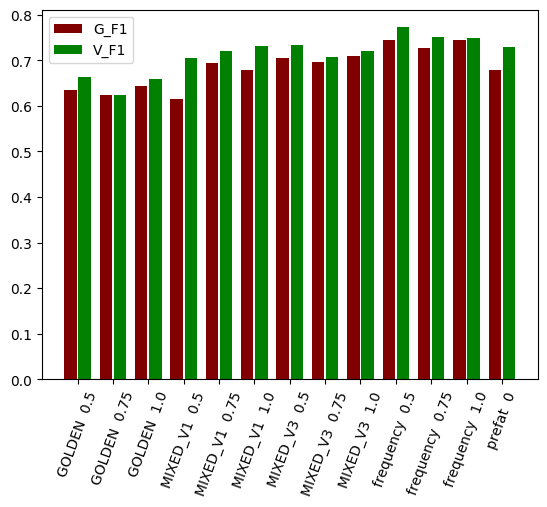

In [47]:
#Batch norm 3

temp_df = df.loc[df["layer"] == "batch_normalization_3"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

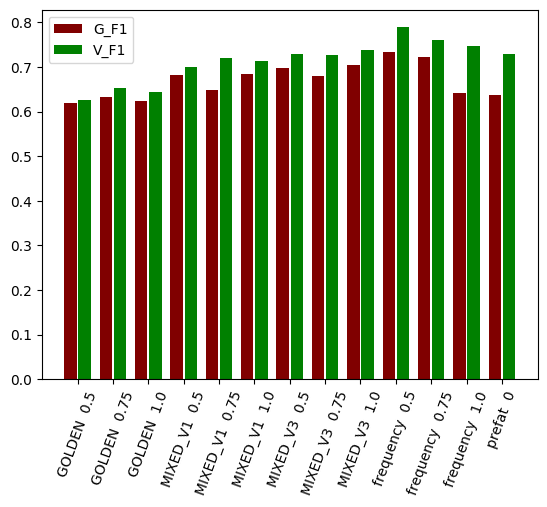

In [50]:
#Batch norm 4

temp_df = df.loc[df["layer"] == "batch_normalization_4"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

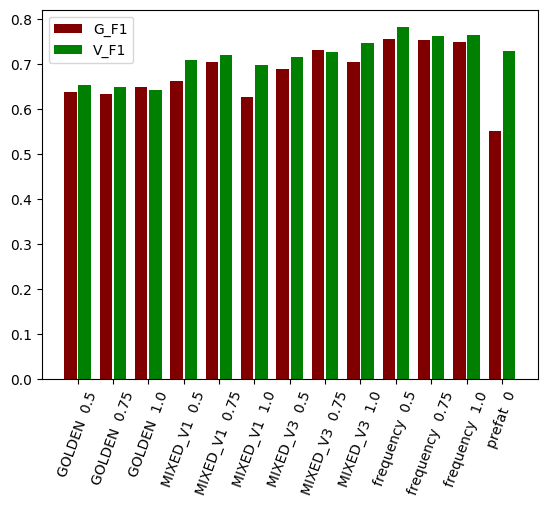

In [49]:
#Batch norm 5

temp_df = df.loc[df["layer"] == "batch_normalization_5"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

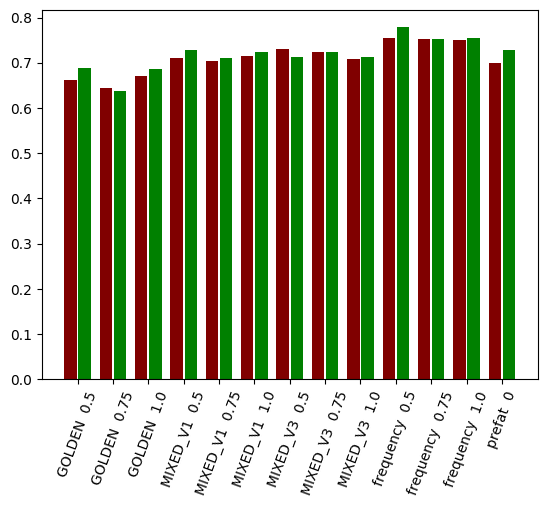

In [44]:
#Batch norm 6

temp_df = df.loc[df["layer"] == "batch_normalization_6"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

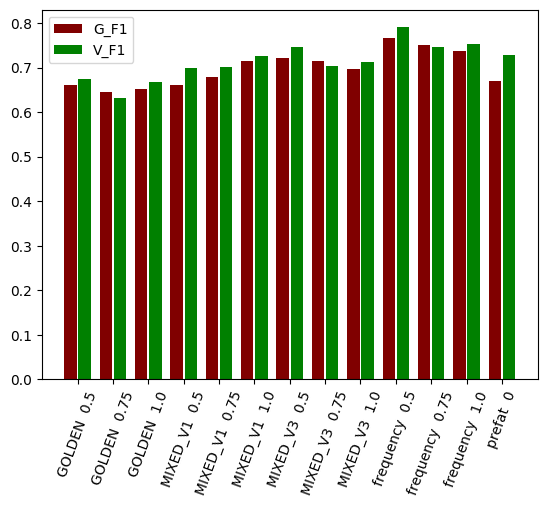

In [51]:
#Batch norm 7

temp_df = df.loc[df["layer"] == "batch_normalization_7"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

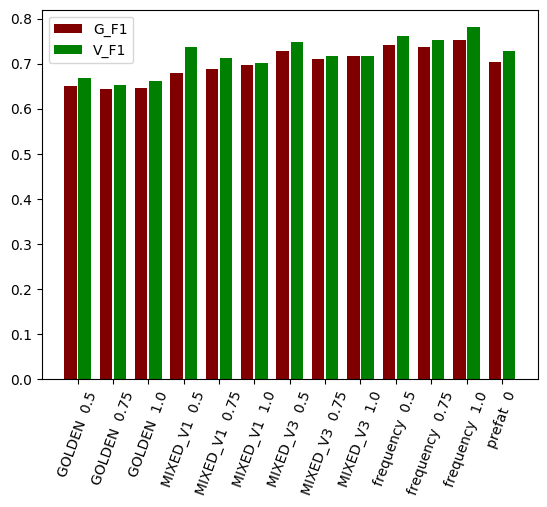

In [52]:
#Batch norm 8

temp_df = df.loc[df["layer"] == "batch_normalization_8"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

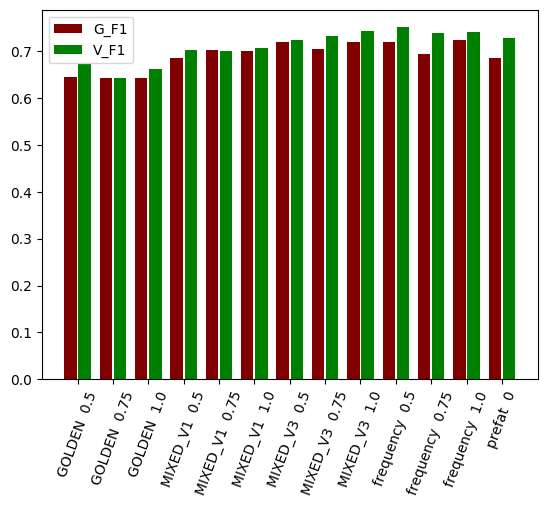

In [53]:
#Batch norm 9

temp_df = df.loc[df["layer"] == "batch_normalization_9"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

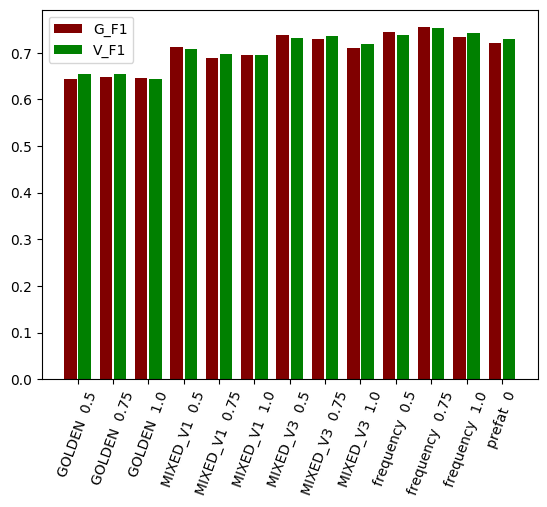

In [54]:
#Batch norm 20

temp_df = df.loc[df["layer"] == "batch_normalization_20"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

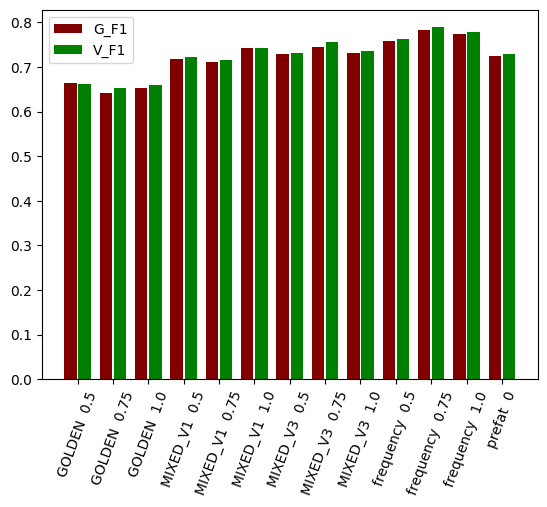

In [55]:
#Batch norm 30

temp_df = df.loc[df["layer"] == "batch_normalization_30"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

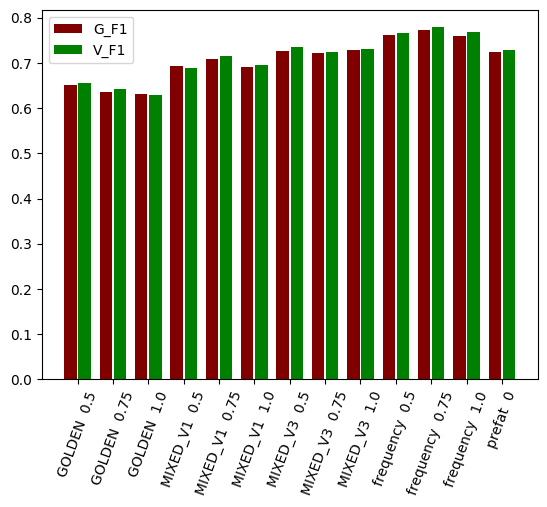

In [56]:
#Batch norm 40

temp_df = df.loc[df["layer"] == "batch_normalization_40"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

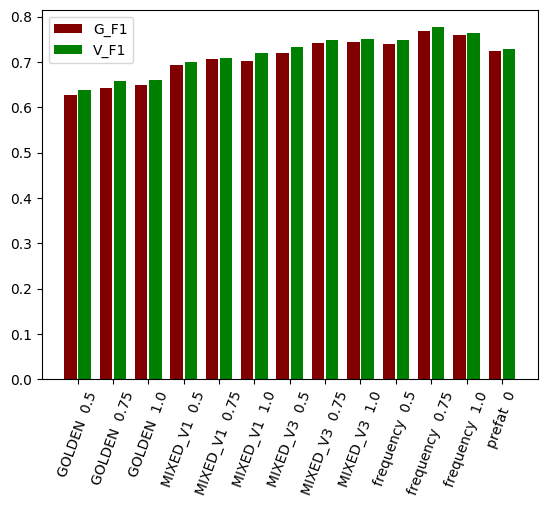

In [57]:
#Batch norm 50

temp_df = df.loc[df["layer"] == "batch_normalization_50"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

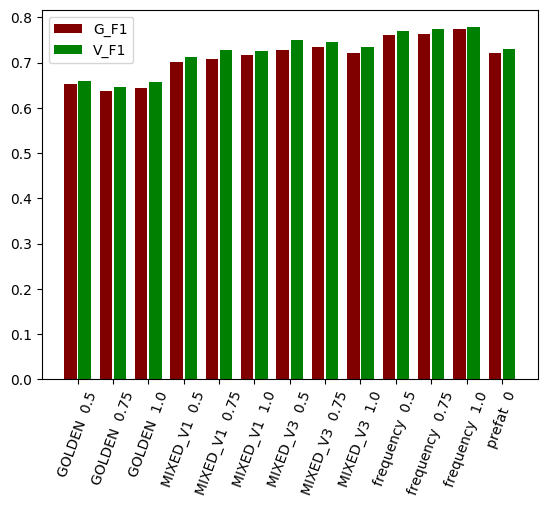

In [58]:
#Batch norm 60

temp_df = df.loc[df["layer"] == "batch_normalization_60"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

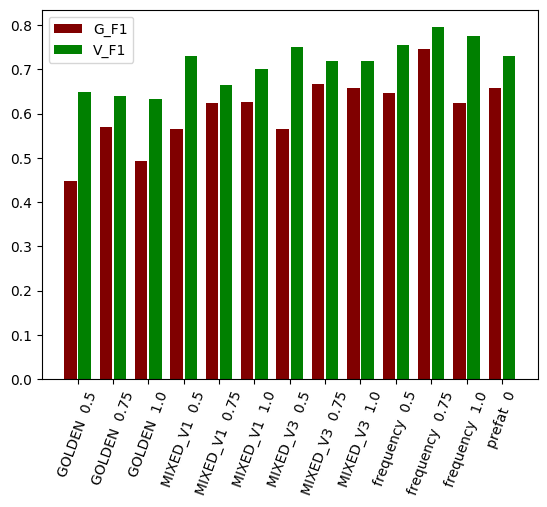

In [59]:
#Batch norm 70

temp_df = df.loc[df["layer"] == "batch_normalization_70"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()

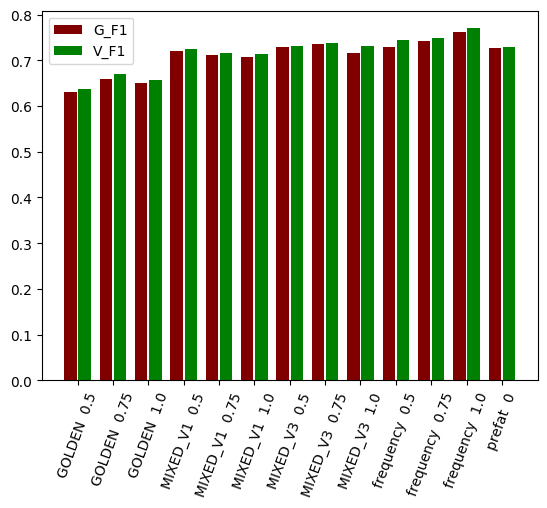

In [60]:
#Conv2d_5

temp_df = df.loc[df["layer"] == "conv2d_5"]
temp_df = temp_df.groupby(by = ["Experiment", "frequency"]).mean()
x = temp_df.index.values
X_axis = np.arange(len(x))
x = [str(i)+"  "+str(j) for i, j in x]
y = temp_df["G_F1"]
y1 = temp_df["V_F1"]
plt.bar(X_axis - 0.2, y, color ='maroon', width = 0.35, label = "G_F1")
plt.bar(X_axis + 0.2, y1, color ='green', width = 0.35, label = "V_F1")
plt.xticks(X_axis, x, rotation = 70)
plt.legend()
plt.show()